# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

# Objective

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [699]:
# Import apis

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

import statsmodels.api as sm
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [700]:
# load data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [701]:
# Check shape
df.shape

(730, 16)

In [702]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [703]:
# Columns
print('\n'.join(df.columns))

instant
dteday
season
yr
mnth
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


# Data dictionary

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [704]:
# Check columns details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [705]:
# Change dteday to datetime
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

In [706]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [708]:
# check and map season

season_map = { 
    1: 'spring', 
    2: 'summer',
    3: 'fall',
    4: 'winter'
}       
    
df['season'] = df['season'].apply(lambda x : season_map[x])
df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [709]:
# check and map yr if required
df['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [710]:
# check and map mnth

month_map = {
    1: 'Jan', 
    2: 'Feb', 
    3: 'Mar', 
    4: 'Apr', 
    5: 'May', 
    6: 'Jun', 
    7: 'Jul',
    8: 'Aug',
    9: 'Sept',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
    

df['mnth'] = df['mnth'].apply(lambda x : month_map[x])
df['mnth'].value_counts()

mnth
Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: count, dtype: int64

In [711]:
df['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [712]:
# check and map mnth

day_map = {
    1: 'Wed', 
    2: 'Thurs', 
    3: 'Fri', 
    4: 'Sat', 
    5: 'Sun', 
    6: 'Mon', 
    0: 'Tues'
}
    

df['weekday'] = df['weekday'].apply(lambda x : day_map[x])
df['weekday'].value_counts()

weekday
Mon      105
Tues     105
Wed      105
Thurs    104
Sat      104
Sun      104
Fri      103
Name: count, dtype: int64

In [713]:
# check and map workingday
df['workingday'].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [714]:
# check and map weather situation

weather_situation_map = {
    1: 'WS1', 
    2: 'WS2', 
    3: 'WS3', 
    4: 'WS4'    
}
    
df['weathersit'] = df['weathersit'].apply(lambda x : weather_situation_map[x])
df['weathersit'].value_counts()

weathersit
WS1    463
WS2    246
WS3     21
Name: count, dtype: int64

# Data Visyalization

In [715]:
# Identify Numeric and Categorical columns

numeric_columns = [
    'temp',
    'atemp',
    'hum',
    'windspeed',
    'casual',
    'registered',
    'cnt'
]

categorical_columns = [
    'season',
    'mnth',
    'weekday',
    'weathersit'
]

numeric_df = df[numeric_columns]
categorical_df = df[categorical_columns]

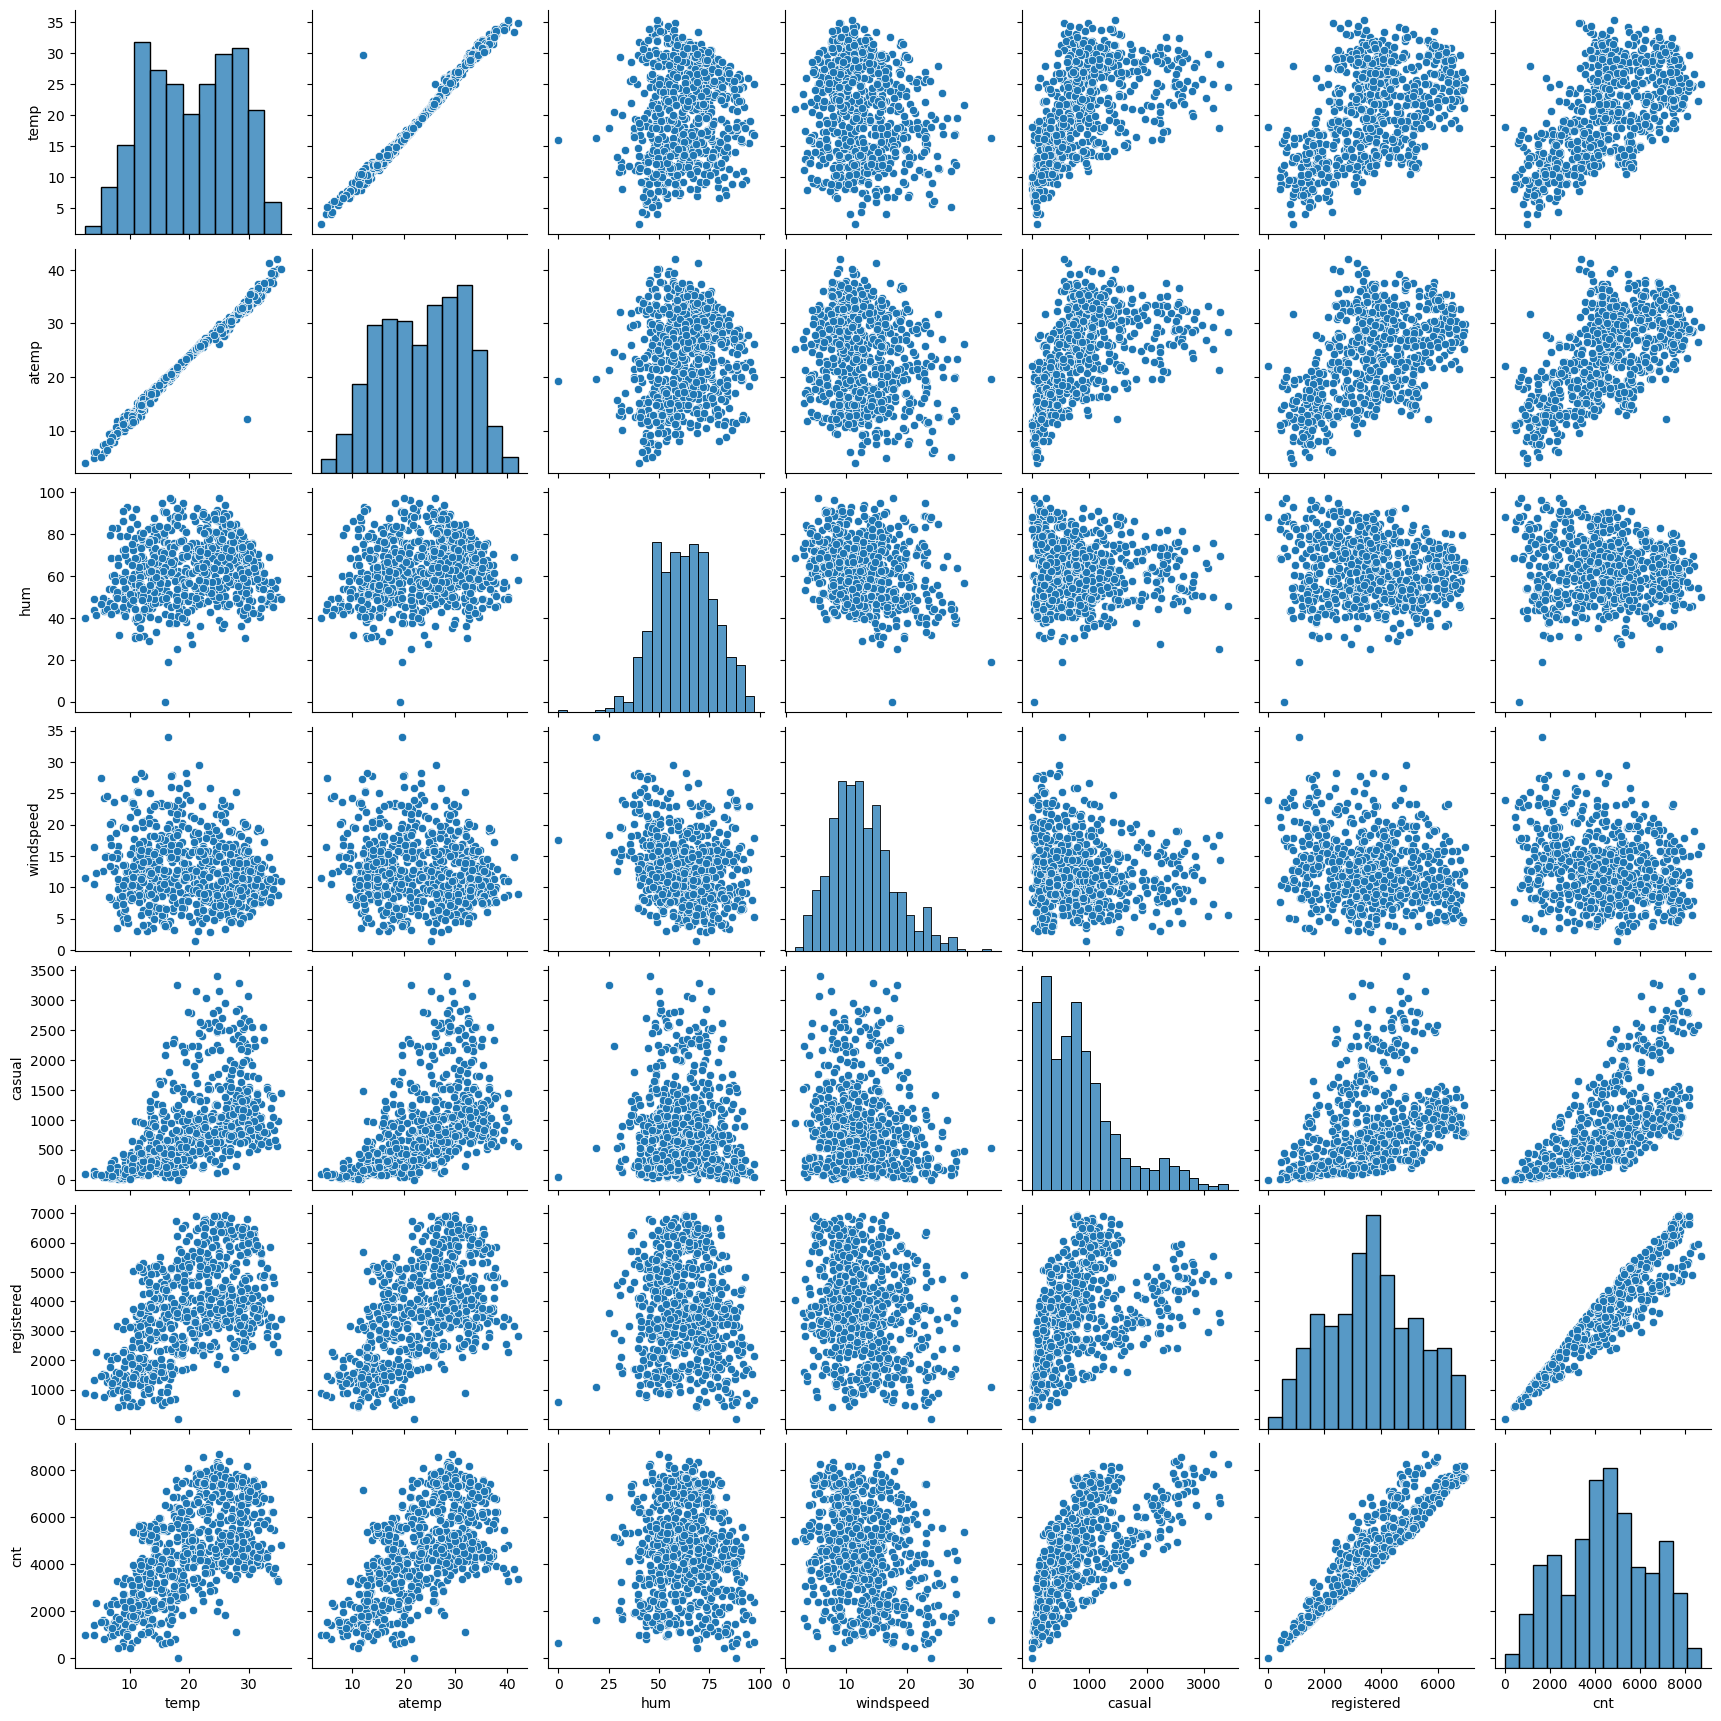

In [716]:
# Check Numeric Columns
sns.pairplot(numeric_df)
plt.show()

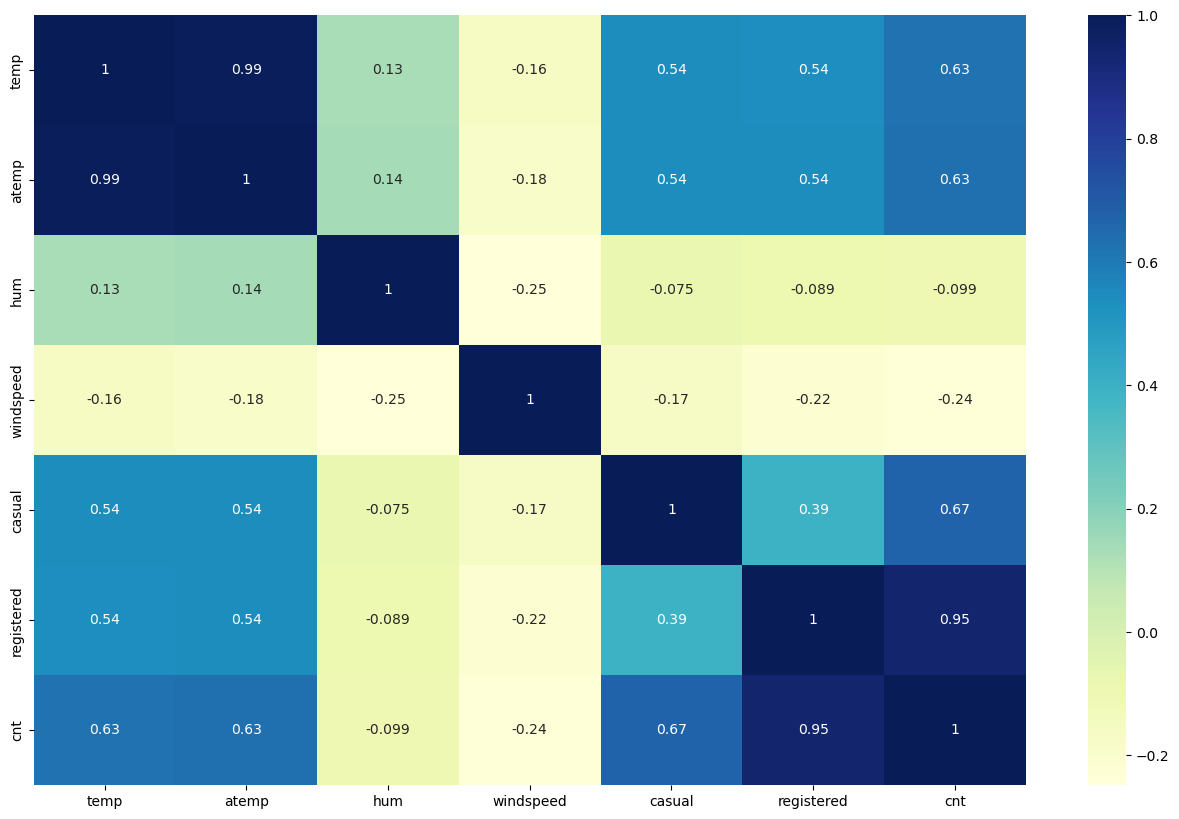

In [717]:
plt.figure(figsize = (16, 10))
sns.heatmap(numeric_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [718]:
# temp and atemp looks highly correlated
df.drop('atemp', axis=1, inplace=True)  

numeric_columns.remove('atemp')

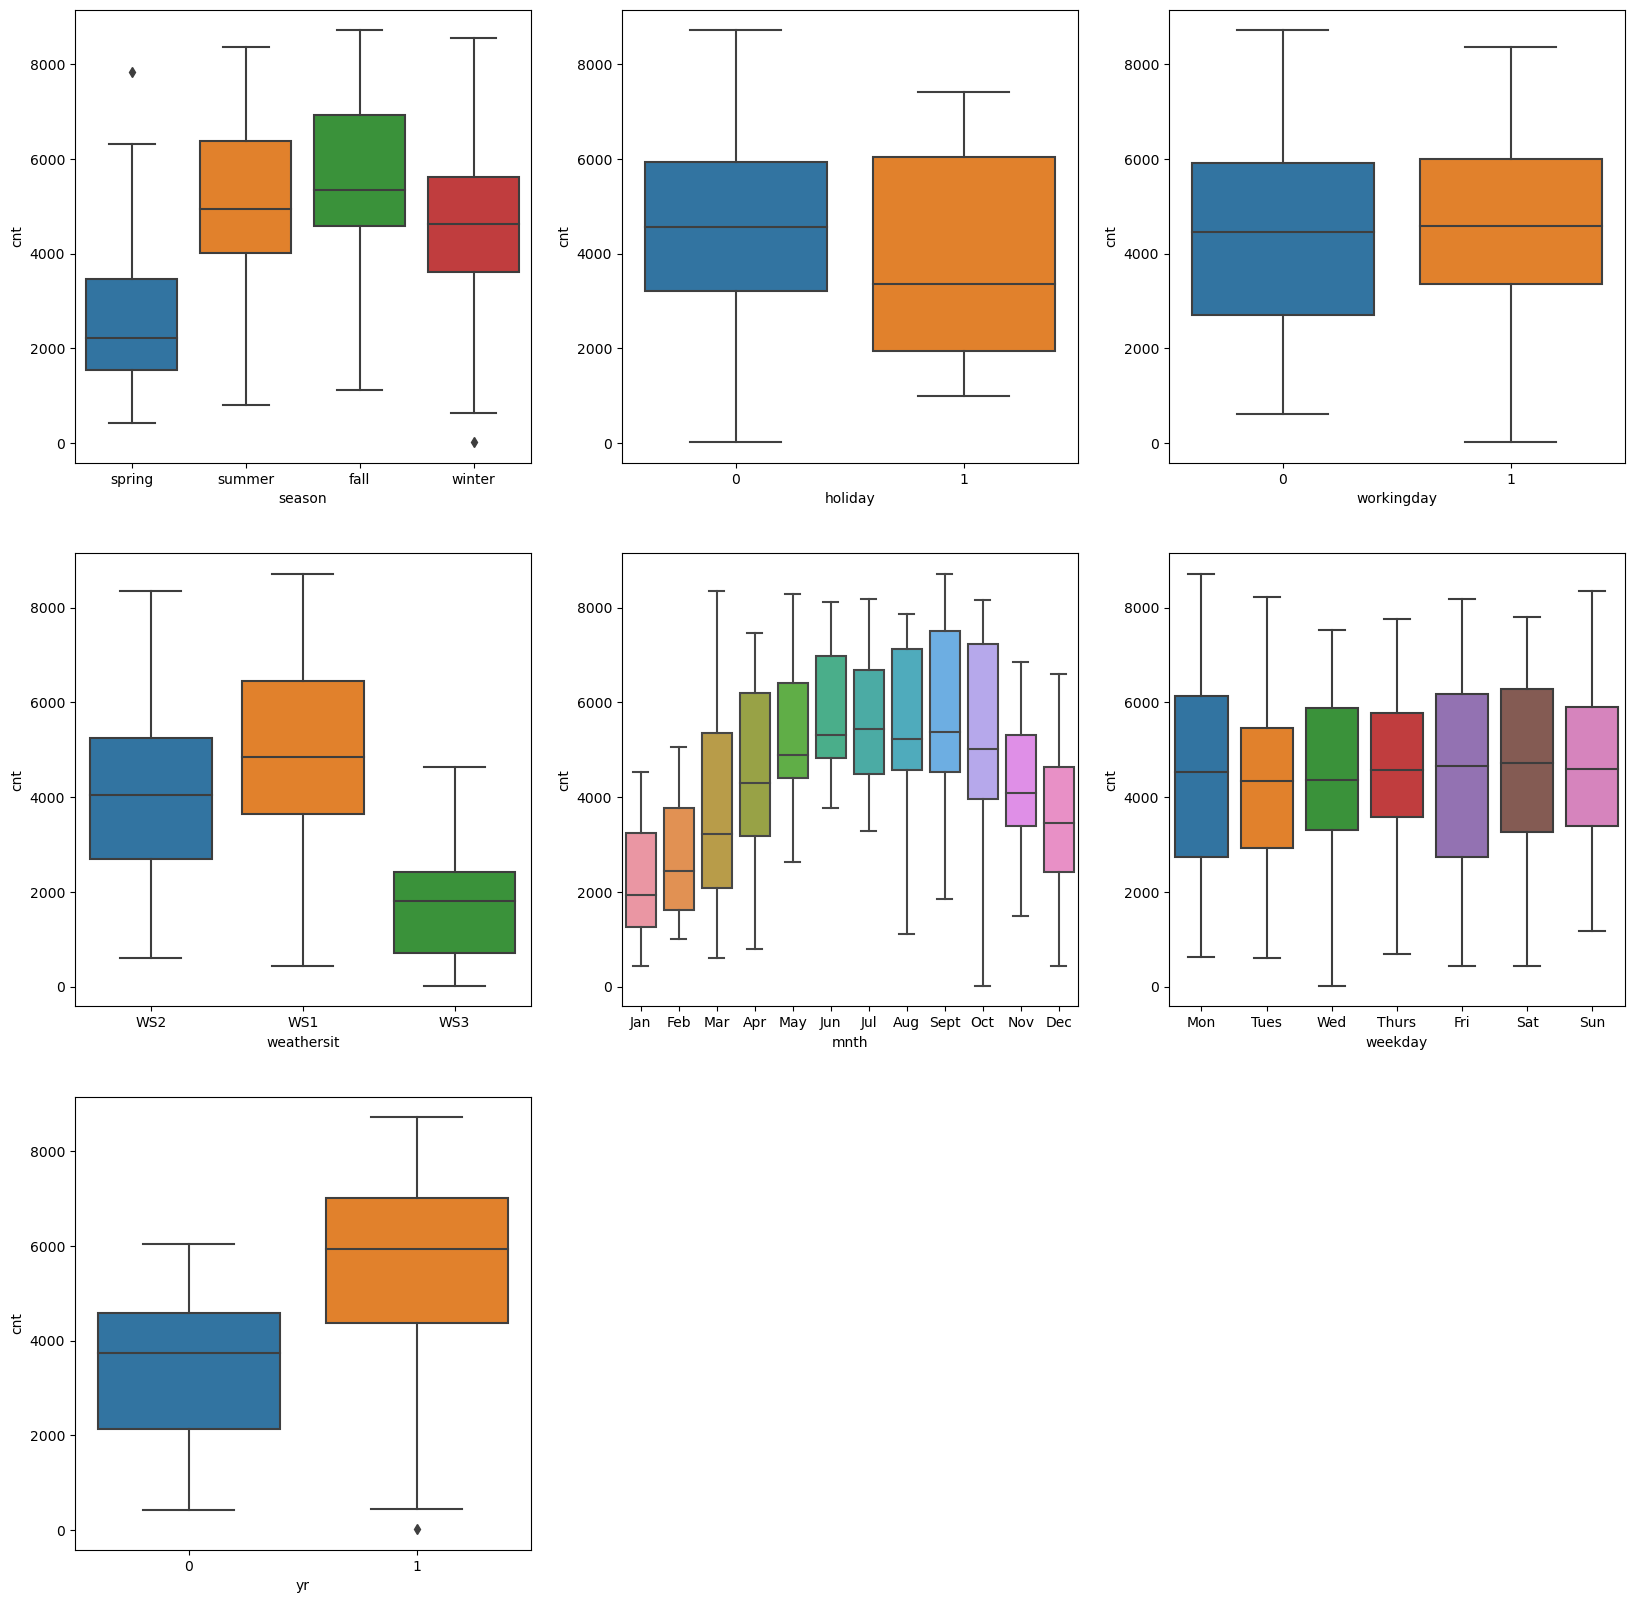

In [719]:
# Visualize Categorical varaiables

plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

# Dummy Variables

In [720]:
categorical_dummy_values = pd.get_dummies(df[categorical_columns], drop_first = True, dtype='int')
categorical_dummy_values.head()  
    


,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_WS2,weathersit_WS3
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [721]:
df = df.drop(list(categorical_columns), axis=1)

In [722]:
df = pd.concat([df, categorical_dummy_values], axis=1)
df.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_WS2,weathersit_WS3
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [723]:
df = df.drop(['instant','dteday'], axis = 1, inplace = False)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_WS2,weathersit_WS3
0,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [724]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [725]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_WS2,weathersit_WS3
653,1,0,1,19.201653,55.8333,12.208807,922,6612,7534,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968,6248,7216,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956,3110,4066,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364,1432,1796,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120,3100,4220,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017,5647,6664,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,30.852500,65.9583,8.666718,983,6278,7261,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139,1778,1917,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,275,2464,2739,0,...,0,0,1,0,0,0,0,0,1,0


In [726]:
scaler = MinMaxScaler()
print(numeric_columns)
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])
df_train

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_WS2,weathersit_WS3
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,1,0,0,0,0,0,1,0


In [727]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_WS2,weathersit_WS3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


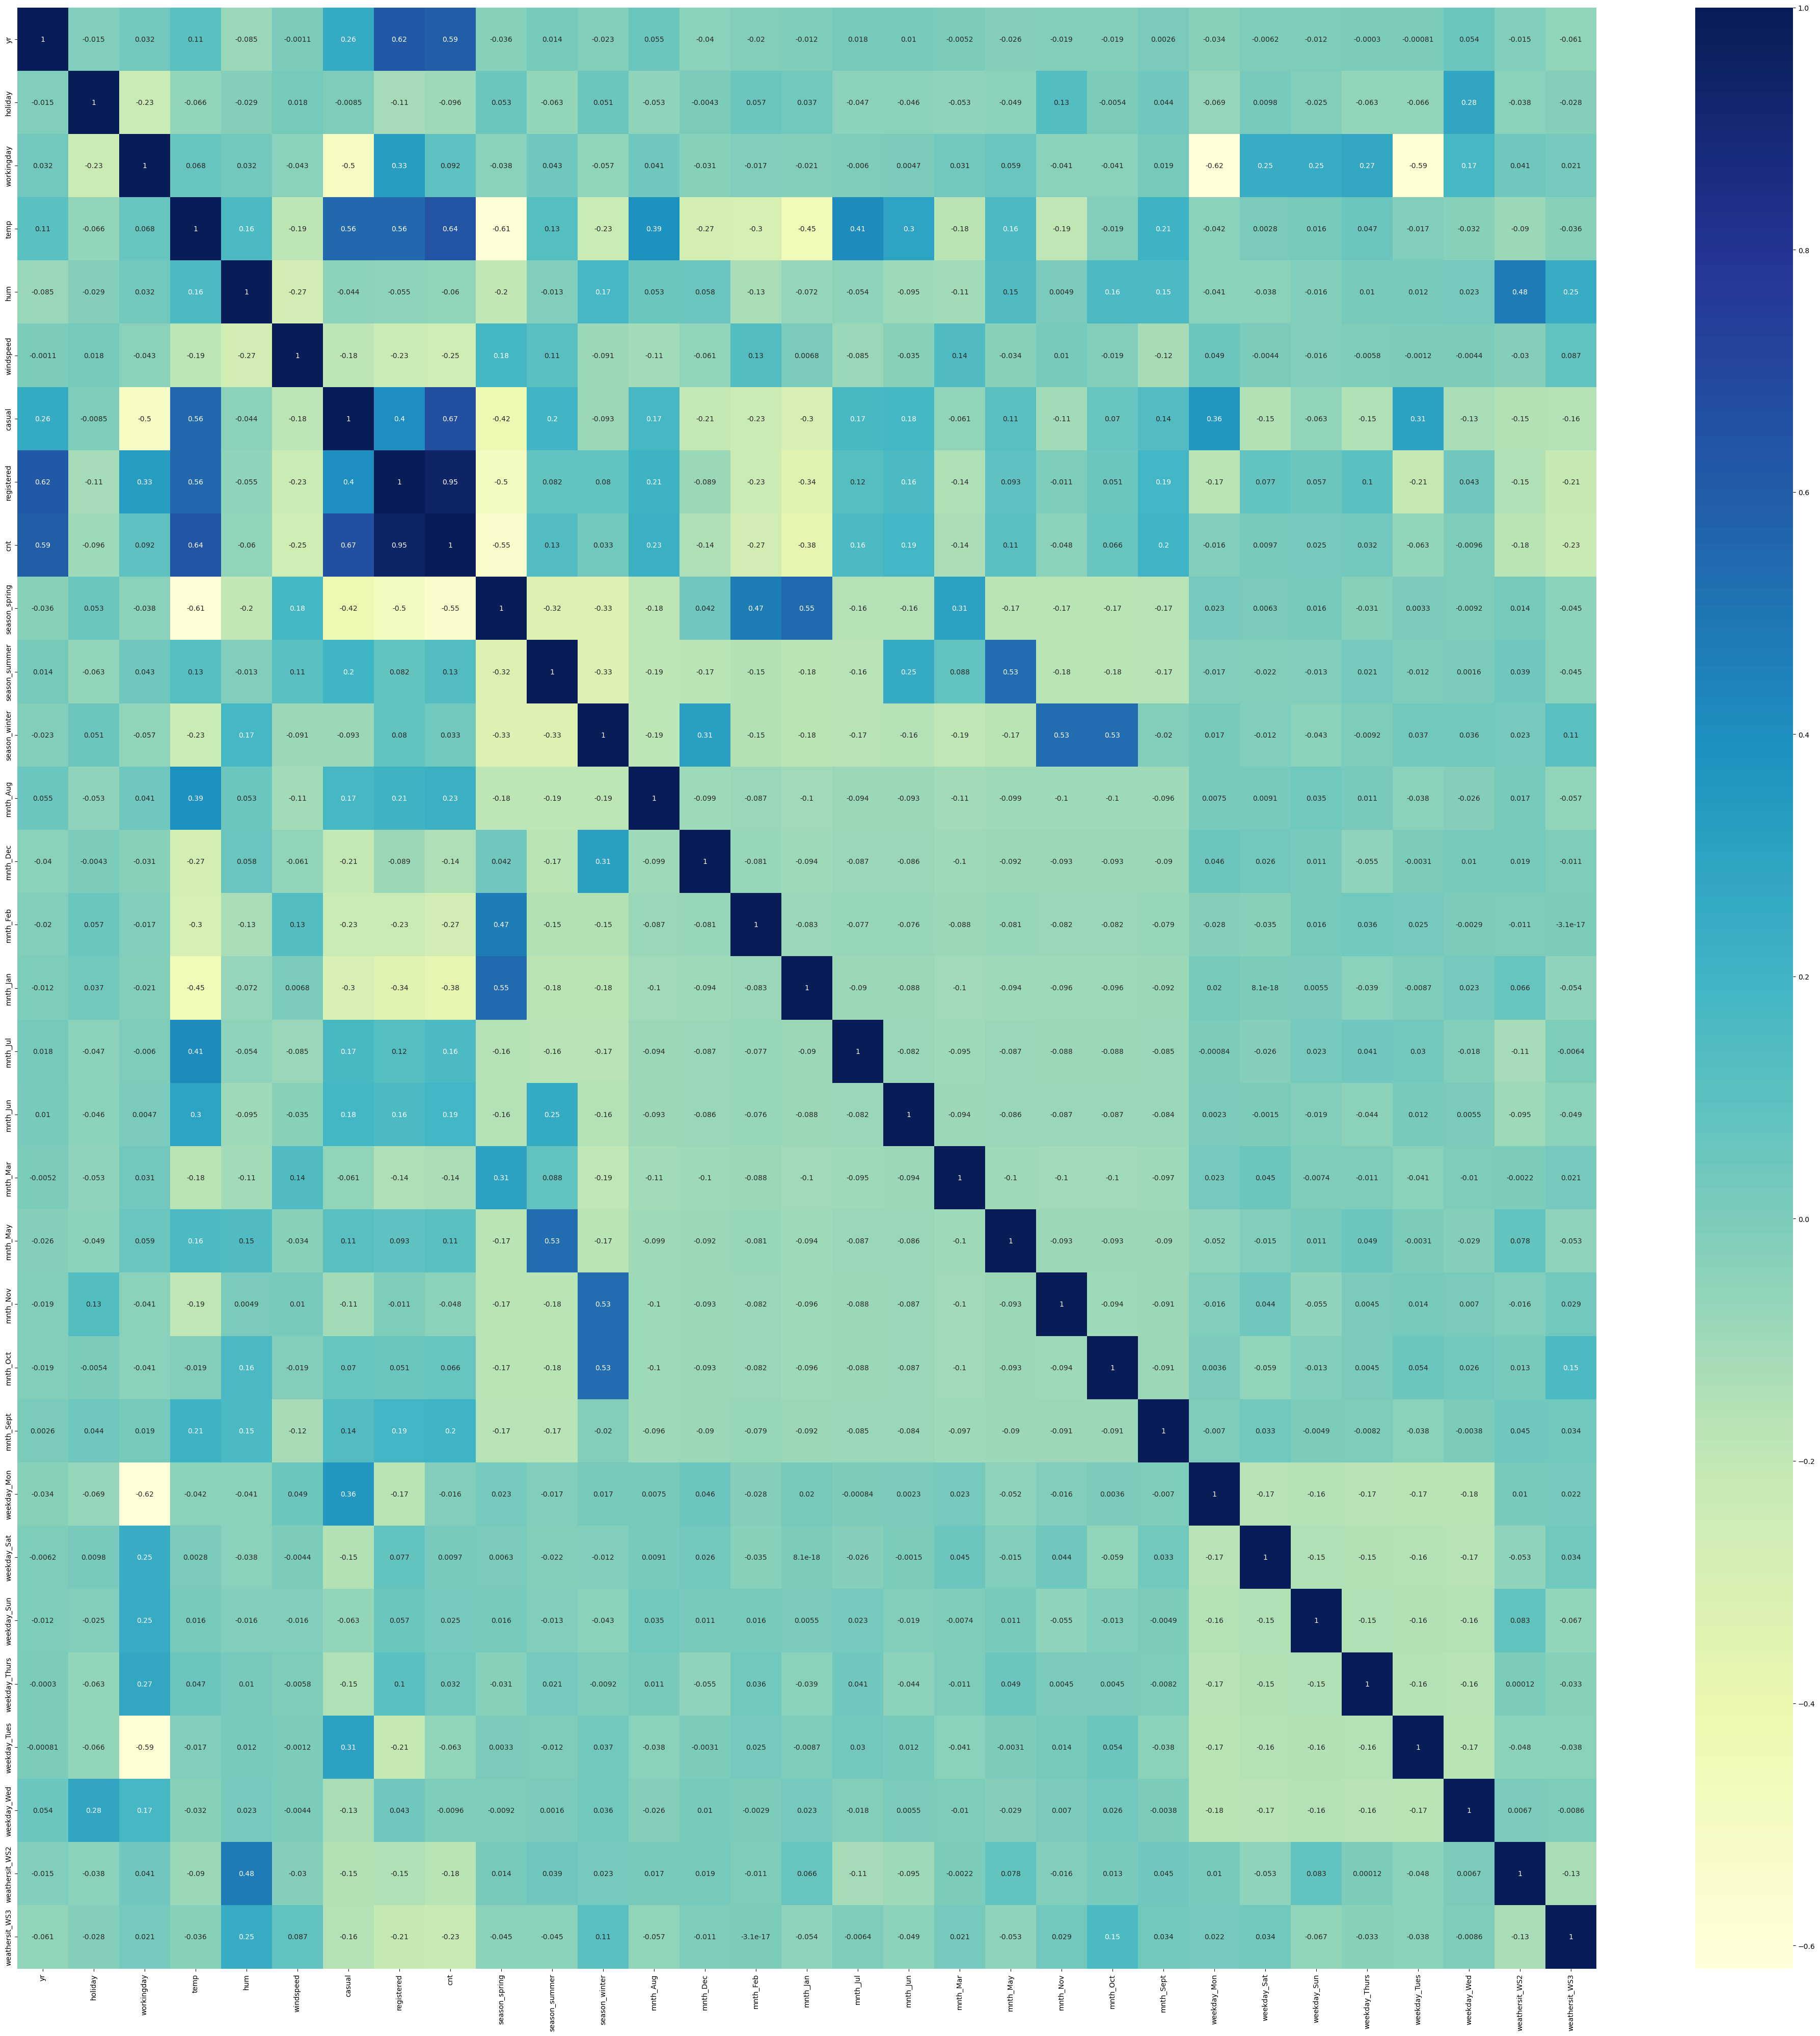

In [728]:
plt.figure(figsize = (50, 50))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [729]:
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [730]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_WS2,weathersit_WS3
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [731]:
np.asarray(df_train)
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const             0.242930
yr                0.232116
holiday           0.006726
workingday        0.093651
temp              0.450562
hum              -0.151340
windspeed        -0.186453
season_spring    -0.048159
season_summer     0.038725
season_winter     0.105847
mnth_Aug          0.014404
mnth_Dec         -0.045586
mnth_Feb         -0.032282
mnth_Jan         -0.062777
mnth_Jul         -0.040350
mnth_Jun         -0.002972
mnth_Mar          0.001045
mnth_May          0.023940
mnth_Nov         -0.041851
mnth_Oct          0.007534
mnth_Sept         0.081060
weekday_Mon       0.098544
weekday_Sat      -0.003849
weekday_Sun       0.005388
weekday_Thurs    -0.013502
weekday_Tues      0.044008
weekday_Wed      -0.015519
weathersit_WS2   -0.061066
weathersit_WS3   -0.257443
dtype: float64

In [732]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [733]:
lm.intercept_

-586273244435.6692

In [734]:
lm.coef_

array([ 2.32222269e-01,  5.86273244e+11,  5.86273244e+11,  4.50597873e-01,
       -1.51613822e-01, -1.86532562e-01, -4.83346123e-02,  3.84962092e-02,
        1.05910876e-01,  1.40772031e-02, -4.56521135e-02, -3.21133300e-02,
       -6.26341574e-02, -4.05223248e-02, -3.05168574e-03,  1.17167861e-03,
        2.39959983e-02, -4.19160792e-02,  7.56761162e-03,  8.10349988e-02,
        5.86273244e+11, -3.67630130e-03,  5.39255563e-03, -1.34318064e-02,
        5.86273244e+11, -1.54656522e-02, -6.10079080e-02, -2.57337578e-01])

In [735]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          8.74e-182
Time:                        19:48:34   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2429      0.035      6.854      0.000       0.173       0.313
yr                 0.2321      0.008     28.820      0.000       0.216       0.248
holiday            0.0067      0.024      0.278      0.781      -0.041       0.054
workingday         0.0937      0.012      7.783      0.000       0.070       0.117
temp               0.4506      0.046      9.734      0.000       0.360       0.542
hum               -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed         -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring     -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer      0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter      0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug           0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec          -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb          -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan          -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul          -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun          -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar           0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May           0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov          -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct           0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept          0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon        0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat       -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun        0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs     -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues       0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed       -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_WS2    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_WS3    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.28e+16
================================

In [736]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [737]:
rfe.ranking_

array([ 1,  1,  5,  1,  1,  1,  1,  3,  1, 11,  8,  9,  6,  1, 18, 19, 10,
        7, 15,  1,  4, 17, 16, 14, 12, 13,  2,  1])

In [738]:
ref_cols = X_train.columns[rfe.support_]
X_train_rfe = X_train[ref_cols]

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sept,weathersit_WS3
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0


In [739]:
lm_ref = sm.OLS(y_train, X_train_rfe).fit()   

In [740]:
lm_ref.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.53e-184
Time:                        19:48:34   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3769      0.031     12.133      0.000       0.316       0.438
yr                 0.2281      0.008     27.102      0.000       0.212       0.245
holiday           -0.0920      0.026     -3.472      0.001      -0.144      -0.040
temp               0.5147      0.031     16.542      0.000       0.454       0.576
hum               -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed         -0.1887      0.026     -7.194      0.000      -0.240      -0.137
season_spring     -0.1005      0.015     -6.536      0.000      -0.131      -0.070
season_winter      0.0653      0.013      5.153      0.000       0.040       0.090
mnth_Jul          -0.0805      0.018     -4.538      0.000      -0.115      -0.046
mnth_Sept          0.0598      0.016      3.723      0.000       0.028       0.091
weathersit_WS3    -0.1980      0.026     -7.659      0.000      -0.249      -0.147
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [741]:
vif_df = X_train_rfe.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = vif_df.columns
vif['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
7,mnth_Jul,1.40
8,mnth_Sept,1.20
9,weathersit_WS3,1.11
1,holiday,1.04


In [742]:
lm = LinearRegression()
rfe_optimized = RFE(lm, n_features_to_select = 7)
rfe_optimized.fit(X_train, y_train)

rfe_optimized.support_

array([ True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [743]:
rfe_optimized.ranking_

array([ 1,  2,  8,  1,  1,  1,  1,  6,  3, 14, 11, 12,  9,  1, 21, 22, 13,
       10, 18,  4,  7, 20, 19, 17, 15, 16,  5,  1])

In [744]:
ref_optimized_cols = X_train.columns[rfe_optimized.support_]
X_train_rfe_optimized = X_train[ref_optimized_cols]
X_train_rfe_optimized = sm.add_constant(X_train_rfe_optimized)
X_train_rfe_optimized.head()

,const,yr,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_WS3
653,1.0,1,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0


In [745]:
lm_ref_optimized = sm.OLS(y_train, X_train_rfe_optimized).fit()   
lm_ref_optimized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.34e-178
Time:                        19:48:34   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4277      0.030     14.348      0.000       0.369       0.486
yr                 0.2301      0.009     26.240      0.000       0.213       0.247
temp               0.4480      0.027     16.720      0.000       0.395       0.501
hum               -0.2412      0.033     -7.324      0.000      -0.306      -0.176
windspeed         -0.2066      0.027     -7.591      0.000      -0.260      -0.153
season_spring     -0.1487      0.013    -11.498      0.000      -0.174      -0.123
mnth_Jul          -0.0901      0.018     -4.945      0.000      -0.126      -0.054
weathersit_WS3    -0.1867      0.027     -6.933      0.000      -0.240      -0.134
==============================================================================
Omnibus:                       45.817   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.848
Skew:                          -0.547   Prob(JB):                     8.40e-20
Kurtosis:                       4.714   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [746]:
vif_df = X_train_rfe_optimized.drop('const',axis=1)

def vif(vif_df):
        vif = pd.DataFrame()
        vif['Features'] = vif_df.columns
        vif['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        return vif.sort_values(by = "VIF", ascending = False)
        

vif(vif_df)


,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,season_spring,1.80
5,mnth_Jul,1.35
6,weathersit_WS3,1.11


In [747]:
X_train_rfe_optimized.drop("hum",axis=1,inplace=True)
X_train_rfe_optimized

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_WS3
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [748]:
X_train_rfe_optimized = sm.add_constant(X_train_rfe_optimized)

lm_ref_optimized = sm.OLS(y_train, X_train_rfe_optimized).fit()   
lm_ref_optimized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.37e-168
Time:                        19:48:34   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2596      0.020     12.986      0.000       0.220       0.299
yr                 0.2360      0.009     25.713      0.000       0.218       0.254
temp               0.4279      0.028     15.277      0.000       0.373       0.483
windspeed         -0.1524      0.028     -5.536      0.000      -0.206      -0.098
season_spring     -0.1413      0.014    -10.427      0.000      -0.168      -0.115
mnth_Jul          -0.0715      0.019     -3.769      0.000      -0.109      -0.034
weathersit_WS3    -0.2413      0.027     -8.873      0.000      -0.295      -0.188
==============================================================================
Omnibus:                       54.941   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.150
Skew:                          -0.657   Prob(JB):                     1.09e-22
Kurtosis:                       4.742   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [749]:
vif_df = X_train_rfe_optimized.drop('const',axis=1)

vif(vif_df)

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
3,season_spring,1.49
4,mnth_Jul,1.26
5,weathersit_WS3,1.04


# Check Residual

In [750]:
y_train_count = lm_ref_optimized.predict(X_train_rfe_optimized)

Text(0.5, 0, 'errors')

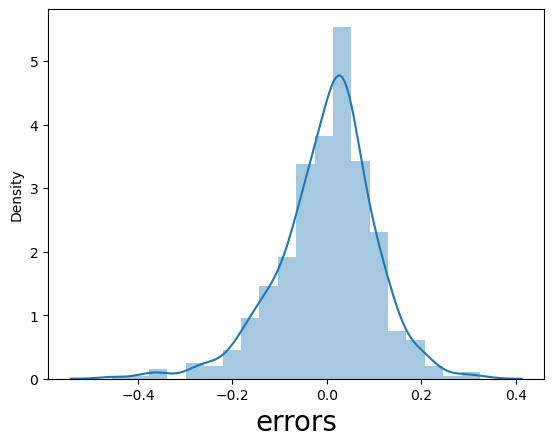

In [751]:
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
plt.xlabel('errors', fontsize = 20)

In [752]:
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

In [753]:
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [754]:
X_test_rfe = X_test[vif_df.columns]

In [755]:
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   yr              219 non-null    int64  
 2   temp            219 non-null    float64
 3   windspeed       219 non-null    float64
 4   season_spring   219 non-null    int32  
 5   mnth_Jul        219 non-null    int32  
 6   weathersit_WS3  219 non-null    int32  
dtypes: float64(3), int32(3), int64(1)
memory usage: 11.1 KB


In [756]:
y_pred = lm_ref_optimized.predict(X_test_rfe)

Text(0, 0.5, 'y pred')

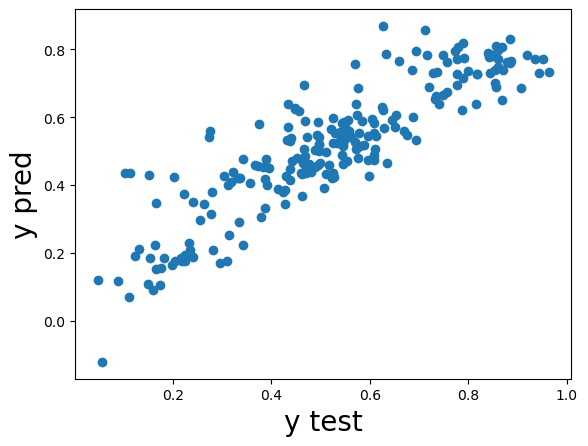

In [757]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('y test', fontsize = 20) 
plt.ylabel('y pred', fontsize = 20)  

In [758]:
r2_score(y_test, y_pred)

0.7802124353228019